In [116]:
# Importing the Libraries
import numpy 
import matplotlib.pyplot as plt
import pandas as pd

# Reading CSV file from train set
# We drop all the values, but use the Close price
path = "/Users/frantisek.grossmann/Desktop/Sets/crypto_data/LTC-USD.csv"
df = pd.read_csv(path,names=['Time', 'Low', 'High', 'Open', 'Close', 'Volume'], usecols=[4])
df.head()

,Close
0,96.580002
1,96.660004
2,96.570000
3,96.500000
4,96.389999


## Dataframe for Data Processing

In [117]:
# Function for data processing
# Argument: dataset - new set
# Argument: look_back - observation of the prior time t-1
# for loops runs over the entire dataset and appends X and Y
def new_dataset(dataset, look_back=1): # 
    dataX, dataY = [], [] 
    for i in range(len(dataset)-look_back-1):
        d = dataset[i:(i+look_back), 0]
        dataX.append(d) 
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# RESHAPE
# We reshape the data "Close" price into a list of values

dataset = df.values
dataset = dataset.astype('float32') # the optimal form of the values

# NORMALIZE
# An important step in processing data is to normalize the input variables
# We achieve this through the MinMaxScaler - strictly borders data to range [-1,1]
# The MinMaxScaler does not inclue any outliers

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# SPLITING
# We split our data into training and testing data in the ratio of 70/30
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# WINDOW SETTING
# We use the look_back as a window for observation
# We reshape the dataset into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# We need to finally adjust the data into [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

## Model Construction

In [118]:
# Importing the Keras module with the essentials for creating an RNN with LSTM cell
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Model construction

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

# We compile the model with the following network parametrs
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy']) 
# We assign the fitting to "history" so that we can plot and print the training values
history = model.fit(trainX, trainY, epochs=30, batch_size=5, verbose=2)
model.sumarry()

Epoch 1/30
 - 55s - loss: 0.0030 - acc: 1.4650e-05
Epoch 2/30
 - 53s - loss: 5.2597e-06 - acc: 1.4650e-05
Epoch 3/30
 - 53s - loss: 5.1906e-06 - acc: 1.4650e-05
Epoch 4/30
 - 53s - loss: 5.1488e-06 - acc: 1.4650e-05
Epoch 5/30
 - 53s - loss: 5.0179e-06 - acc: 1.4650e-05
Epoch 6/30
 - 53s - loss: 5.0432e-06 - acc: 1.4650e-05
Epoch 7/30
 - 53s - loss: 4.9582e-06 - acc: 1.4650e-05
Epoch 8/30
 - 52s - loss: 4.9416e-06 - acc: 1.4650e-05
Epoch 9/30
 - 53s - loss: 4.8686e-06 - acc: 1.4650e-05
Epoch 10/30
 - 5567s - loss: 4.7997e-06 - acc: 1.4650e-05
Epoch 11/30
 - 12883s - loss: 4.8435e-06 - acc: 1.4650e-05
Epoch 12/30
 - 58s - loss: 4.6574e-06 - acc: 1.4650e-05
Epoch 13/30
 - 53s - loss: 4.6602e-06 - acc: 1.4650e-05
Epoch 14/30
 - 55s - loss: 4.6114e-06 - acc: 1.4650e-05
Epoch 15/30
 - 57s - loss: 4.5708e-06 - acc: 1.4650e-05
Epoch 16/30
 - 53s - loss: 4.5549e-06 - acc: 1.4650e-05
Epoch 17/30
 - 53s - loss: 4.5409e-06 - acc: 1.4650e-05
Epoch 18/30
 - 53s - loss: 4.4641e-06 - acc: 1.4650e-05


## Prediction

In [119]:
# We create the prodections by assigning the trained data to the predict method of Keras
# We do the same with the testing data
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# We use the invert method to de-normalize the data so that we can apply the prediction
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [120]:
#RMSE Calculation
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.00 RMSE
Test Score: 0.02 RMSE


dict_keys(['loss', 'acc'])


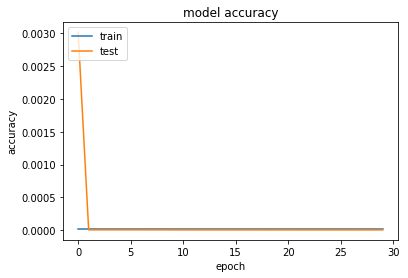

KeyError: 'val_loss'

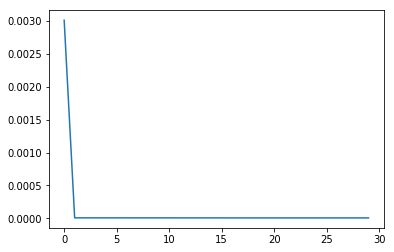

In [123]:
# With the assigned history variable we can check all the available metrics to print
print(history.history.keys())
# Summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'test_loss' is not defined

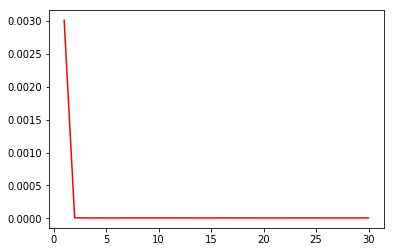

In [125]:
# Get training and test loss histories
training_loss = history.history['loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, 'r')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [128]:
# Calculation and print of model accuracy

print("\n%s:" % (model.metrics_names[1]))
print(100 * testPredict)

print("\n%s:" % (model.metrics_names[1]))
print(100 * trainPredict)



acc:
[[53.140575]
 [53.12435 ]
 [53.13974 ]
 ...
 [17.769938]
 [17.780405]
 [17.783094]]

acc:
[[87.919   ]
 [87.808365]
 [87.671646]
 ...
 [53.126823]
 [53.068428]
 [53.08382 ]]


## Plotting

In [112]:
# We need to shift the train predictions in order to see the results on the plot
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [113]:
# The same is applied on the test predictions
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

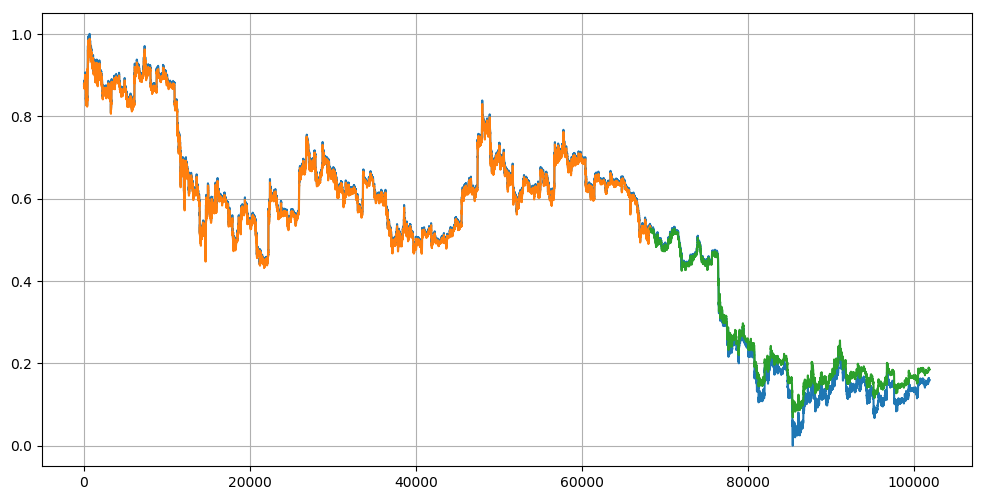

In [114]:
# Plotting
plt.figure(figsize=(12,6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.grid()
plt.show()

## Further Work

In [ ]:
# We need to decide on the best parameters for predicting our future price
# We should construct a model or make a calculation of the possible strategy returns
# Better plotting options
# Add a dropout if overfitted
# define a function for finding the best parametrs through grid search
# Test on a different dataset
# Adequate labelling of plots